In [1]:
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

import numpy as np
import matplotlib.pyplot as plt

In [2]:
X, _ = datasets.make_blobs(n_samples=1000, n_features=25, centers=10, random_state=142)

#### Scale the data

In [3]:
scaled_X = StandardScaler().fit_transform(X)

### K-Means

In [4]:
def run_kmeans(max_k : np.int32):
    s, i = [], []
    for k in range(2,max_k+1):
        km = cluster.KMeans(n_clusters=k, random_state=142).fit(scaled_X)
        silhouette = silhouette_score(scaled_X, km.labels_)
        print("Silhouette score for %u clusters is %.6f" %(k, silhouette))
        s += [silhouette]
        i += [km.inertia_]
    return [s,i]

In [5]:
max_k = 15
silhouettes_km, inertia_km = run_kmeans(max_k)

Silhouette score for 2 clusters is 0.279229
Silhouette score for 3 clusters is 0.331793
Silhouette score for 4 clusters is 0.388944
Silhouette score for 5 clusters is 0.442411
Silhouette score for 6 clusters is 0.508306
Silhouette score for 7 clusters is 0.580861
Silhouette score for 8 clusters is 0.653160
Silhouette score for 9 clusters is 0.715433
Silhouette score for 10 clusters is 0.762960
Silhouette score for 11 clusters is 0.691398
Silhouette score for 12 clusters is 0.629086
Silhouette score for 13 clusters is 0.554102
Silhouette score for 14 clusters is 0.484902
Silhouette score for 15 clusters is 0.413818


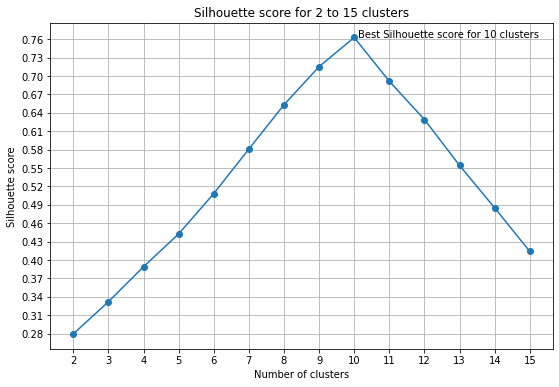

In [6]:
# Plot silhouette score for kmeans
plt.figure(1, figsize=(9,6))
plt.plot(range(2,max_k+1), silhouettes_km, marker='o')
plt.xlabel("Number of clusters")
plt.xticks(range(2, max_k+1))
plt.yticks(np.arange(np.round(np.amin(silhouettes_km),2), np.amax(silhouettes_km), .03))
plt.ylabel("Silhouette score")
plt.annotate("Best Silhouette score for %u clusters" % (np.argmax(silhouettes_km)+2), (np.argmax(silhouettes_km)+2.1, np.amax(silhouettes_km)))
plt.grid()
plt.title("Silhouette score for 2 to %u clusters" % max_k)

plt.show()

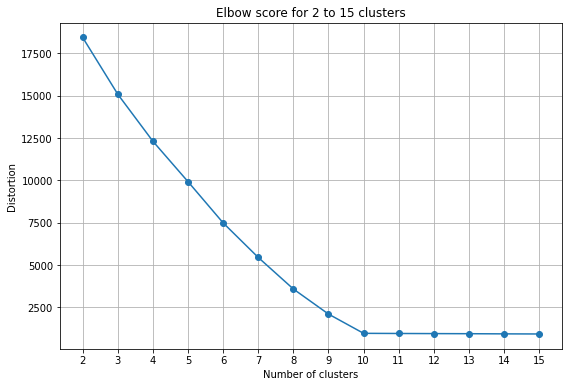

In [7]:
# Plot inertias  for kmeans
plt.figure(1, figsize=(9,6))
plt.plot(range(2,max_k+1), inertia_km, marker='o')
plt.xlabel("Number of clusters")
plt.xticks(range(2, max_k+1))
plt.ylabel("Distortion")
plt.grid()
plt.title("Elbow score for 2 to %u clusters" % max_k)

plt.show()

### DBSCAN

In [8]:
eps_values = (.55, .6, .7, .8, .9, .95, .95, .95, 1.05, 1.1, 1.15, 1.2, 1.3, 1.5, 1.5, 1.5)
min_samples_values = (2, 2, 2, 2, 3, 4, 5, 7, 2, 2, 3, 3, 3, 5, 5, 10)

for eps_, min_sample_ in zip(eps_values, min_samples_values):
    dbscan = cluster.DBSCAN(eps=eps_, min_samples=min_sample_).fit(scaled_X)
    silhouette_db = silhouette_score(scaled_X, dbscan.labels_)
    print("Silhouette for eps = %.2f and min samples = %u is %.6f (%u clusters)" %(eps_, min_sample_, silhouette_db, len(set(dbscan.labels_)))) 

Silhouette for eps = 0.55 and min samples = 2 is -0.066010 (2 clusters)
Silhouette for eps = 0.60 and min samples = 2 is -0.066010 (2 clusters)
Silhouette for eps = 0.70 and min samples = 2 is -0.306805 (5 clusters)
Silhouette for eps = 0.80 and min samples = 2 is -0.725167 (38 clusters)
Silhouette for eps = 0.90 and min samples = 3 is -0.452889 (20 clusters)
Silhouette for eps = 0.95 and min samples = 4 is -0.204134 (18 clusters)
Silhouette for eps = 0.95 and min samples = 5 is -0.302167 (18 clusters)
Silhouette for eps = 0.95 and min samples = 7 is -0.279070 (11 clusters)
Silhouette for eps = 1.05 and min samples = 2 is 0.344872 (15 clusters)
Silhouette for eps = 1.10 and min samples = 2 is 0.599568 (12 clusters)
Silhouette for eps = 1.15 and min samples = 3 is 0.714775 (11 clusters)
Silhouette for eps = 1.20 and min samples = 3 is 0.738906 (11 clusters)
Silhouette for eps = 1.30 and min samples = 3 is 0.762960 (10 clusters)
Silhouette for eps = 1.50 and min samples = 5 is 0.762960 (